<a href="https://colab.research.google.com/github/Danishzaman-0786/cats-vs-dog_classification/blob/main/cats_vs_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdr ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.p/.kaggle/kaggle.json

/bin/bash: line 1: mkdr: command not found
cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:58<00:00, 21.1MB/s]
100% 1.06G/1.06G [00:58<00:00, 19.5MB/s]


In [4]:
#covert zip file to unzip file
import zipfile
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
#we make a CNN model and fit the data

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [19]:
#generaters+>work+>devide the data in batches(minin batchs)
d_train=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
d_validation=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [20]:
#normalize
#we want to all pixels value getting a range(0-1)
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
d_train=d_train.map(process)
d_validation=d_validation.map(process)

In [21]:
#now our data_set is ready
#Now we make a CNN model and fit the data
#creat a CNN model


In [24]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
#.............................
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
#.............................
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#..............................................
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
#our model is ready
#we see summary of oour model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [67]:
his_=model.fit(d_train,epochs=10,validation_data=d_validation)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7931 - loss: 0.4406 - val_accuracy: 0.7774 - val_loss: 0.4848
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.8171 - loss: 0.4000 - val_accuracy: 0.8050 - val_loss: 0.4284
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8402 - loss: 0.3611 - val_accuracy: 0.7550 - val_loss: 0.5691
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 81ms/step - accuracy: 0.8657 - loss: 0.3063 - val_accuracy: 0.7890 - val_loss: 0.5019
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.8905 - loss: 0.2496 - val_accuracy: 0.7926 - val_loss: 0.8306
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.9146 - loss: 0.1998 - val_accuracy: 0.8232 - val_loss: 0.7363
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.9338 - loss: 0.1540 - val_accuracy: 0.8156 - val_loss: 0.7820
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.9439 - loss: 0.1300 - 

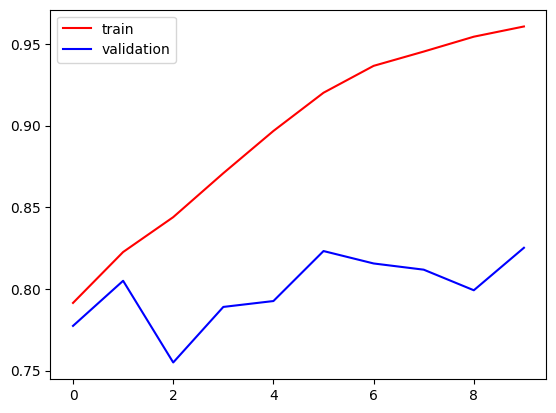

In [68]:
import matplotlib.pyplot as plt
plt.plot(his_.history['accuracy'],color='red',label='train')
plt.plot(his_.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

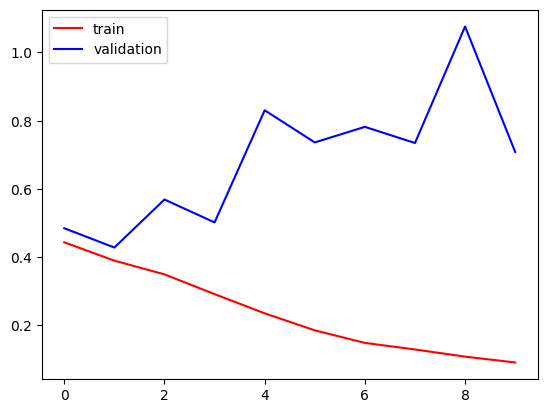

In [69]:
plt.plot(his_.history['loss'],color='red',label='train')
plt.plot(his_.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [70]:
#paths to reduce overfiting(this is best way to reduce the over fiting)
#add more data
#data augmentaton
#L1...or L2
#dropout
#bath Normalization
#reduce complexity

In [71]:
#we select dropout & batch Normalization(remove the overfiting)



In [72]:
import cv2 as c

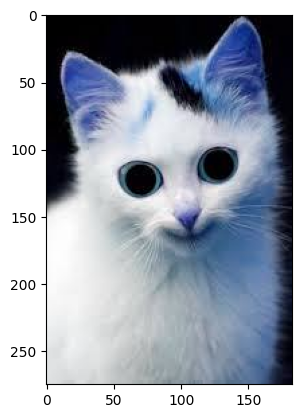

In [73]:

cat=c.imread('/content/cat.jpg')

plt.imshow(cat)

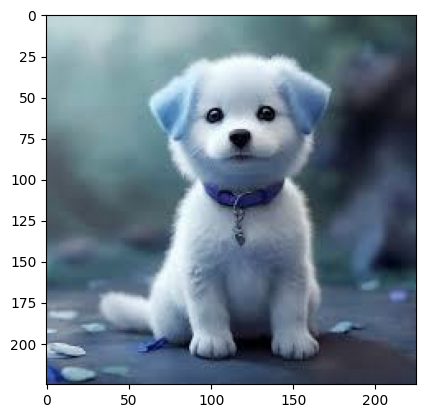

In [74]:
dog=c.imread("/content/dog.jpg")
plt.imshow(dog)

In [75]:
cat.shape

(275, 183, 3)

In [76]:
dog.shape

(225, 225, 3)

In [77]:
#now we resize the images_between(256_256)
test_cat=c.resize(cat,(256,256))
test_dog=c.resize(dog,(256,256))

In [78]:
cat_as_input=test_cat.reshape(1,256,256,3)
dog_as_input=test_dog.reshape(1,256,256,3)

In [79]:
m=model.predict(cat_as_input)
m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.]], dtype=float32)

In [80]:
model.predict(dog_as_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[1.]], dtype=float32)